In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import scale

from scipy.stats import *
from scipy.cluster.hierarchy import *

import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
results = pd.read_excel('./data/Diolinux Browsers Benchmarks - 2023.xlsx')
results

,Navegador,Web Basemark,JetStream 2.1,Motion Mark,Speedometer,HTML5,Uso de RAM do browser (7 abas) MB,Uso RAM sistema em MB com o browser aberto apenas,Versão do browser,Data
0,LibreWolf,1028.876667,132.630333,863.006667,138.333333,465,3111.35,3681,108,2022-12-20
1,GNOME Web,654.536667,213.091667,452.733333,201.000000,448,2887.93,3661,43,2022-12-20
2,Tor,0.000000,0.000000,450.783333,0.000000,416,1871.41,3640,12.0.1,2022-12-21
3,Floorp,824.920000,0.000000,431.326667,181.666667,466,4066.63,3504,108.8.0,2022-12-20
4,Chromium,1372.843333,243.588000,1040.690000,232.266667,526,5244.21,3357,108.0.5359.124,2022-12-20
5,Konqueror,1512.036667,180.261667,784.183333,150.600000,519,2488.30,3255,21.12.3,2022-12-20
6,Falkon,1464.826667,186.243000,801.046667,137.333333,472,4886.64,3253,22.12,2022-12-20
7,Firefox,1310.596667,144.457333,1022.156667,194.666667,464,3916.44,3241,108.0.1,2022-12-20
8,Brave,1526.386667,242.094667,1026.790000,229.000000,521,4038.66,3238,1.46.144,2022-12-20
9,Edge,1262.640000,227.606333,884.936667,180.166667,476,5865.22,3228,108.0.1462.54,2022-12-20


In [50]:
results.columns = ['browser', 'webbasemark', 'jetstream', 'motionmark',
                   'speedometer', 'html5', 'tab_ram', 'idle_ram',
                   'drop1', 'drop2']
results.drop(columns=['drop1', 'drop2'], inplace=True)
results.set_index('browser', inplace=True)
results

,webbasemark,jetstream,motionmark,speedometer,html5,tab_ram,idle_ram
browser,,,,,,,
LibreWolf,1028.876667,132.630333,863.006667,138.333333,465,3111.35,3681
GNOME Web,654.536667,213.091667,452.733333,201.000000,448,2887.93,3661
Tor,0.000000,0.000000,450.783333,0.000000,416,1871.41,3640
Floorp,824.920000,0.000000,431.326667,181.666667,466,4066.63,3504
Chromium,1372.843333,243.588000,1040.690000,232.266667,526,5244.21,3357
Konqueror,1512.036667,180.261667,784.183333,150.600000,519,2488.30,3255
Falkon,1464.826667,186.243000,801.046667,137.333333,472,4886.64,3253
Firefox,1310.596667,144.457333,1022.156667,194.666667,464,3916.44,3241
Brave,1526.386667,242.094667,1026.790000,229.000000,521,4038.66,3238


In [4]:
results.describe()

,webbasemark,jetstream,motionmark,speedometer,html5,tab_ram,idle_ram
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1061.406167,162.033900,715.925167,156.823333,458.750000,3710.219500,3186.750000
std,464.256504,90.026336,270.196614,66.990267,113.329921,1712.367184,290.541939
min,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,2599.000000
25%,816.503333,132.596833,515.730833,142.408333,460.000000,2420.827500,2993.250000
50%,1258.803334,195.057667,792.615000,180.583333,471.500000,3977.550000,3215.500000
75%,1384.663333,227.743000,885.675000,191.166667,521.750000,5263.050000,3280.500000
max,1560.100000,244.433333,1040.690000,233.333333,528.000000,5942.880000,3681.000000


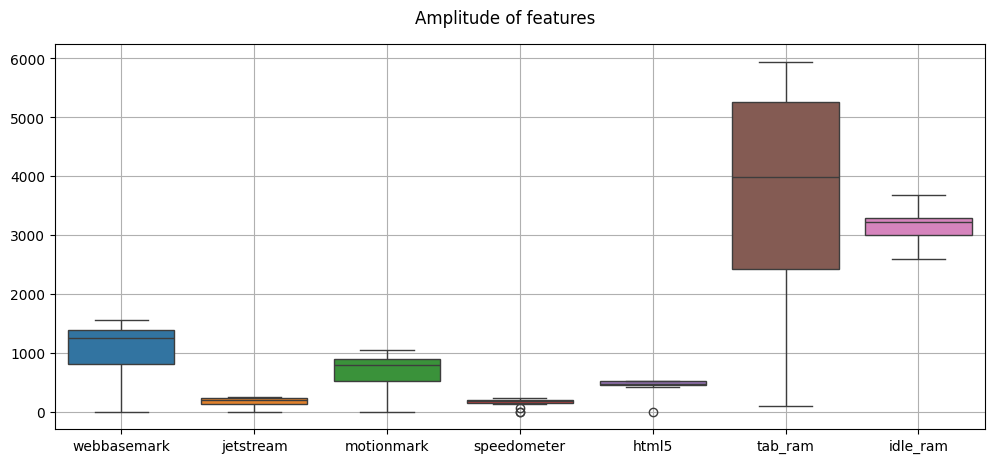

In [51]:
plt.figure(figsize=(12,5))

plt.suptitle('Amplitude of features', y = 0.95)
sns.boxplot(data=results)
plt.grid()

In [7]:
results_scaled = scale(results.iloc[:, 1:])
results_scaled = pd.DataFrame(results_scaled, columns=results.columns[1:], index=results.index)

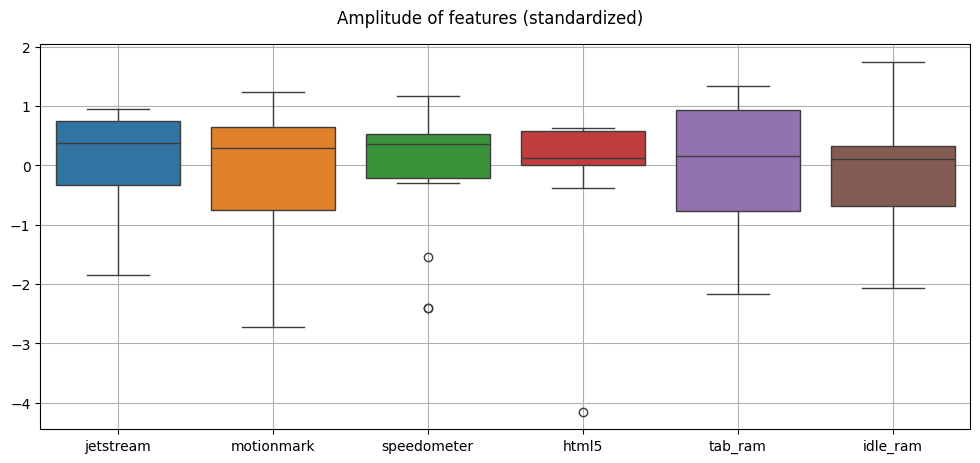

In [8]:
plt.figure(figsize=(12,5))

plt.suptitle('Amplitude of features (standardized)', y = 0.95)
sns.boxplot(data=results_scaled, palette='tab10')
plt.grid()

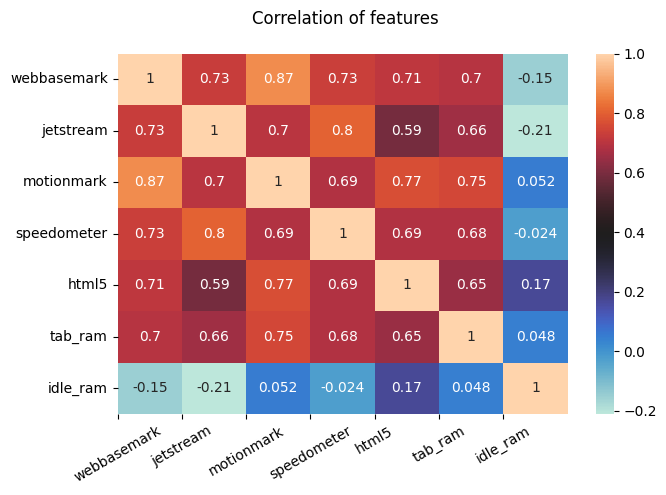

In [17]:
plt.figure(figsize=(7, 5))
plt.suptitle('Correlation of features')
sns.heatmap(results.corr(), annot=True, cmap='icefire')
plt.xticks(list(range(0, len(results.columns))),
           labels=list(results.columns), rotation=30)
plt.tight_layout()
plt.show()

In [53]:
np.log(-5)

C:\Users\conta\AppData\Local\Temp\ipykernel_14716\179989164.py:1: RuntimeWarning: invalid value encountered in log
  np.log(-5)


nan

In [42]:
# Bartlett Sphericity test
cor = results.corr()

n, k = results.shape
ddof = (k * (k - 1)) / 2

det = np.linalg.det(cor)
assert det > 0, f"Determinante = {det}"

log = np.log(det)
mult = (((2 * k) + 5) / 6) - (n - 1)

print('Bartlett Sphericity test')
print(f'chi2: {round(mult * log, 5)} ddof: {ddof}')
print(f'Bartlett chi2 pvalue: {round(chi2.sf(mult * log, ddof), 5)}')

Bartlett Sphericity test
chi2: 87.51954 ddof: 15.0
Bartlett chi2 pvalue: 0.0


In [44]:
# PCA
eigen = np.linalg.eig(cor)
e_val = eigen.eigenvalues
e_vec = eigen.eigenvectors


# Factors selection
# Kaiser criteria eigenvalue > 1
kaiser = [list(e_val).index(x) for x in sorted(e_val)[::-1] if x > 1]

print(f'Eigenvalues: {e_val}\nKaiser n: {len(kaiser)}')

e_val = e_val[kaiser]
e_vec = e_vec[:, kaiser]

Eigenvalues: [4.57613148 0.10292663 0.18051275 0.47511845 0.3136961  0.35161459]
Kaiser n: 1


In [34]:
# Factors calculations
score = e_vec / np.sqrt(e_val)
factors = results @ score
scaled_factors = scale(results) @ score


# Factors Loadings
factor_load = []

for tipo in results.columns:
    xl = []
    x = results[tipo].values
    for y in scaled_factors.T:
        xl.append(pearsonr(x, y).statistic)
    factor_load.append(xl)

factor_load = pd.DataFrame(factor_load, index=results.columns)
scaled_factors = pd.DataFrame(scale(results) @ score, index=results.index)

# Comunalities
sum([factor_load[x] ** 2 for x in factor_load.columns])

webbasemark    0.825752
jetstream      0.729344
motionmark     0.836212
speedometer    0.767404
html5          0.703506
tab_ram        0.713914
Name: 0, dtype: float64

In [35]:
# PCA
eigen = np.linalg.eig(cor)
e_val = eigen.eigenvalues
e_vec = eigen.eigenvectors


# Factors selection
# Kaiser criteria eigenvalue > 1
kaiser = [list(e_val).index(x) for x in sorted(e_val)[::-1][:2]]

print(f'Eigenvalues: {e_val}\nKaiser n: {len(kaiser)}')

e_val = e_val[kaiser]
e_vec = e_vec[:, kaiser]

Eigenvalues: [4.57613148 0.10292663 0.18051275 0.47511845 0.3136961  0.35161459]
Kaiser n: 2


In [36]:
# Factors calculations
score = e_vec / np.sqrt(e_val)
factors = results @ score
scaled_factors = scale(results) @ score


# Factors Loadings
factor_load = []

for tipo in results.columns:
    xl = []
    x = results[tipo].values
    for y in scaled_factors.T:
        xl.append(pearsonr(x, y).statistic)
    factor_load.append(xl)

factor_load = pd.DataFrame(factor_load, index=results.columns)
scaled_factors = pd.DataFrame(scale(results) @ score, index=results.index)

# Comunalities
sum([factor_load[x] ** 2 for x in factor_load.columns])

webbasemark    0.834735
jetstream      0.916359
motionmark     0.894106
speedometer    0.868578
html5          0.819054
tab_ram        0.718418
dtype: float64

In [37]:
factor_load

,0,1
webbasemark,-0.908709,0.094775
jetstream,-0.854016,-0.432453
motionmark,-0.914446,0.240612
speedometer,-0.876016,-0.318079
html5,-0.838752,0.339923
tab_ram,-0.844934,0.067109


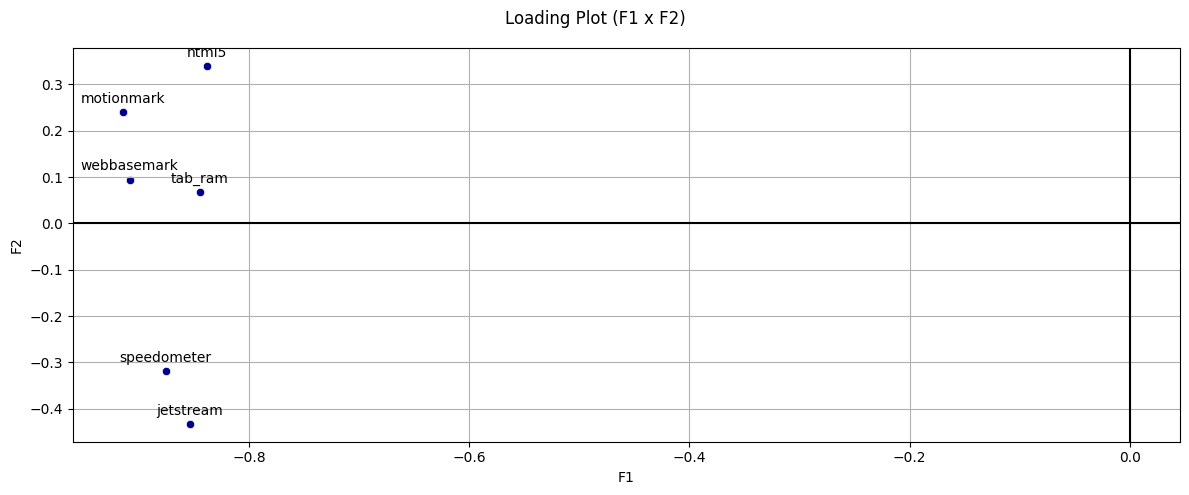

In [38]:
# Loading plot
plt.figure(figsize=(12, 5))

plt.suptitle('Loading Plot (F1 x F2)')
sns.scatterplot(factor_load, x=0, y=1, color='darkblue')
plt.axhline(label='F1', color='black')
plt.axvline(label='F2', color='black')
plt.xlabel('F1')
plt.ylabel('F2')
plt.grid()

for tipo in factor_load.index:
    x1, x2 = factor_load.loc[tipo, :]
    x2 += .02
    plt.text(x1, x2, tipo, va='baseline', ha='center',
             wrap=True, clip_on=True, snap=True,)

plt.tight_layout()

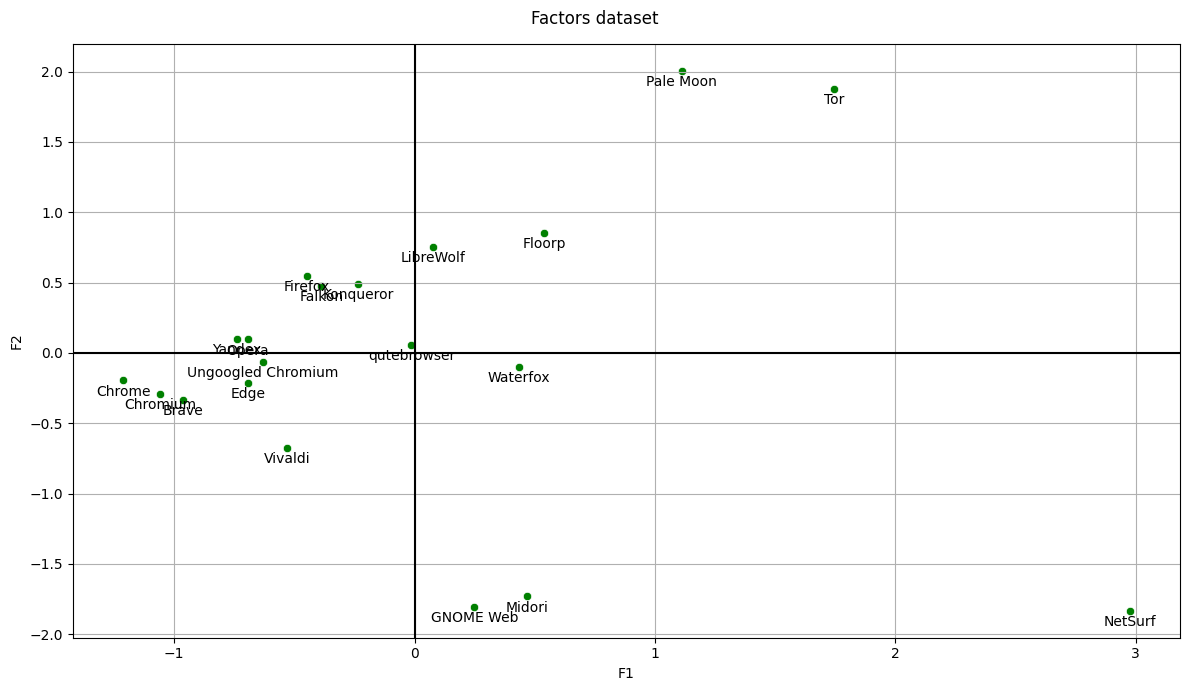

In [45]:
plt.figure(figsize=(12, 7))

plt.suptitle('Factors dataset')
sns.scatterplot(scaled_factors, x=0, y=1, color='green')
plt.axhline(color='black')
plt.axvline(color='black')
plt.xlabel('F1')
plt.ylabel('F2')
plt.grid()

for fun in scaled_factors.index:
    x, y = scaled_factors.loc[fun].values
    y += -.03
    plt.text(x, y, fun, va='top', ha='center',
            wrap=True, snap=True, clip_on=True)

plt.tight_layout()

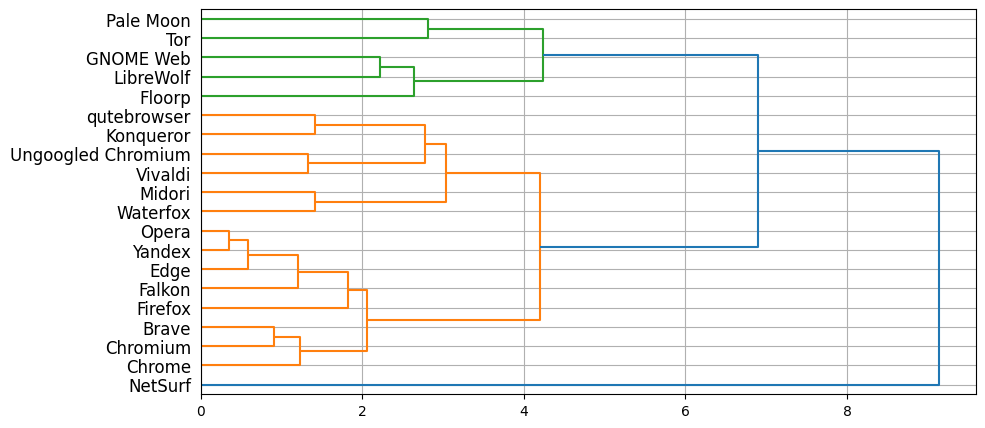

In [24]:
plt.figure(figsize=(10, 5))
dendrogram(linkage(results_scaled, 'complete', ''), orientation='right', labels=results_scaled.index)
plt.grid()
plt.show()